In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import new_lib as nl
import sklearn.preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.model_selection import train_test_split
import wrangle as w

In [2]:
zil = w.wrangle_zillow()
zil
# acquiring and prepping the data set 

,id,bedrooms,bathrooms,square_footage,tax_value,yearbuilt,tax,fips
index,,,,,,,,
0,20,4.0,2.0,3633.0,296425.0,2005,6941.39,6037.0
1,31,3.0,4.0,1620.0,847770.0,2011,10244.94,6037.0
2,33,3.0,2.0,2077.0,646760.0,1926,7924.68,6037.0
3,62,0.0,0.0,1200.0,5328.0,1972,91.60,6037.0
4,97,0.0,0.0,171.0,6920.0,1973,255.17,6037.0
...,...,...,...,...,...,...,...,...
2140230,2982265,4.0,4.0,4375.0,422400.0,2015,13877.56,6037.0
2140231,2982268,4.0,3.0,2262.0,960756.0,2015,13494.52,6059.0
2140232,2982270,4.0,4.5,3127.0,536061.0,2014,6244.16,6059.0


In [3]:
mm_scaler = MinMaxScaler()
ss_scaler = StandardScaler()
rs_scaler = RobustScaler()
qt_scaler = QuantileTransformer(output_distribution = 'normal')
# setting scalers as variables for ease of use

In [4]:
train, validate, test, X_train, y_train, X_val, y_val, X_test, y_test = nl.train_vailidate_test_split(zil, 'tax')

In [5]:
train = train[train.square_footage <= 8000]
train.head()

,id,bedrooms,bathrooms,square_footage,tax_value,yearbuilt,tax,fips
index,,,,,,,,
1333796,1858407,3.0,2.0,1083.0,277190.0,1950,3706.19,6037.0
47453,66239,1.0,1.0,754.0,171284.0,1923,2517.82,6037.0
2032110,2830628,4.0,3.0,2440.0,809631.0,1961,8771.32,6059.0
1188554,1656233,5.0,2.5,2228.0,160663.0,1965,1876.08,6111.0
1703017,2372828,2.0,1.0,1134.0,62490.0,1948,873.31,6037.0


In [6]:
mm_scaler.fit(train[['square_footage']])

MinMaxScaler()

In [7]:
MinMaxScaler(X_train)

MinMaxScaler(feature_range=              id  bedrooms  bathrooms  square_footage  tax_value  yearbuilt  \
index                                                                         
1333796  1858407       3.0        2.0          1083.0   277190.0       1950   
47453      66239       1.0        1.0           754.0   171284.0       1923   
2032110  2830628       4.0        3.0          2440.0   809631.0       1961   
1188554  1656233       5.0        2.5          2228.0   160663.0       1965   
1703017  2372828       2.0        1.0          1134.0    62490.0       1948   
...          ...       ...        ...             ...        ...        ...   
1731121  2411565       3.0        2.0          1194.0   410542.0       1955   
1669939  2326900       3.0        2.5          1613.0   544000.0       1994   
1177839  1641387       3.0        2.0          1246.0   142511.0       1949   
466971    650572       3.0        2.0          1653.0   695000.0       1959   
620630    864261       4.0        3.0          2761.0   792683.0       2004   

           fips  
index            
1333796  6037.0  
47453    6037.0  
2032110  6059.0  
1188554  6111.0  
1703017  6037.0  
...         ...  
1731121  6059.0  
1669939  6111.0  
1177839  6111.0  
466971   6037.0  
620630   6037.0  

[1198531 rows x 7 columns])

In [8]:
mm_zil = mm_scaler.transform(train[['square_footage']])

In [9]:
ss_scaler.fit(train[['square_footage']])

StandardScaler()

In [10]:
ss_zil = ss_scaler.transform(train[['square_footage']])

In [11]:
rs_scaler.fit(train[['square_footage']])

RobustScaler()

In [12]:
rs_zil = rs_scaler.transform(train[['square_footage']])

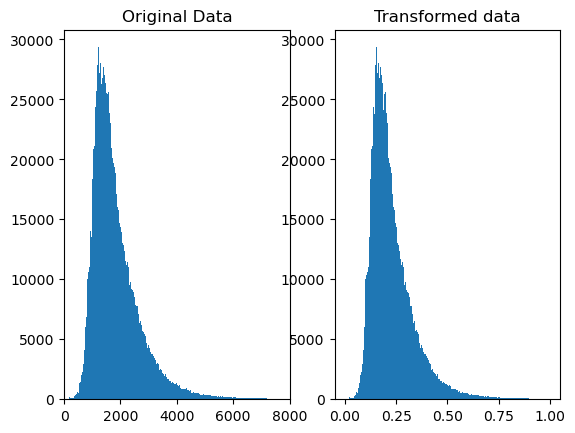

In [13]:
plt.subplot(121)
plt.hist(train['square_footage'], bins = 250)
plt.xlim(0,8000)
plt.title('Original Data')

plt.subplot(122)
plt.hist(mm_zil, bins = 250)
plt.title('Transformed data')
plt.show()

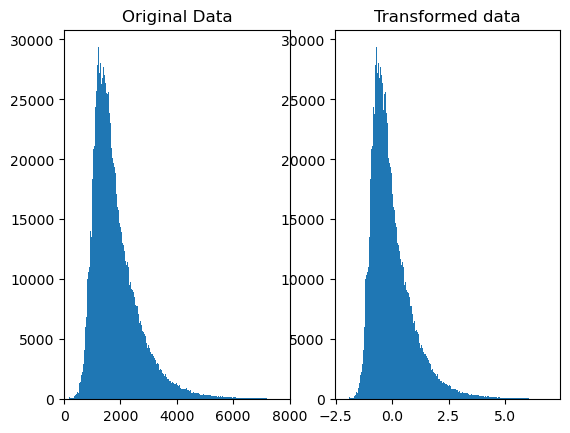

In [14]:
plt.subplot(121)
plt.hist(train['square_footage'], bins = 250)
plt.xlim(0,8000)
plt.title('Original Data')

plt.subplot(122)
plt.hist(ss_zil, bins = 250)
plt.title('Transformed data')
plt.show()

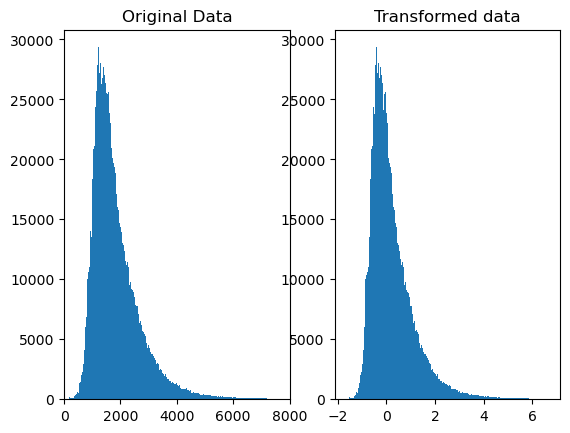

In [15]:
plt.subplot(121)
plt.hist(train['square_footage'], bins = 250)
plt.xlim(0,8000)
plt.title('Original Data')

plt.subplot(122)
plt.hist(rs_zil, bins = 250)
plt.title('Transformed data')
plt.show()

In [16]:
rs_scaler.inverse_transform(rs_zil)

array([[1083.],
       [ 754.],
       [2440.],
       ...,
       [1246.],
       [1653.],
       [2761.]])

In [17]:
qt_scaler.fit(train[['square_footage']])

QuantileTransformer(output_distribution='normal')

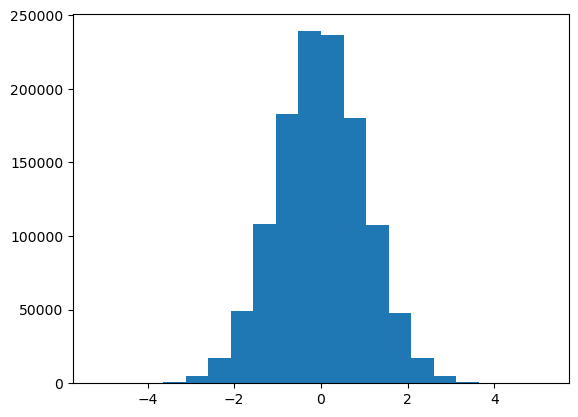

In [18]:
qt_zil = qt_scaler.transform(train[['square_footage']])
plt.hist(qt_zil, bins = 20)
plt.show()

In [19]:
qt_scaler2 = QuantileTransformer()

In [20]:
qt_scaler2.fit(train[['square_footage']])

QuantileTransformer()

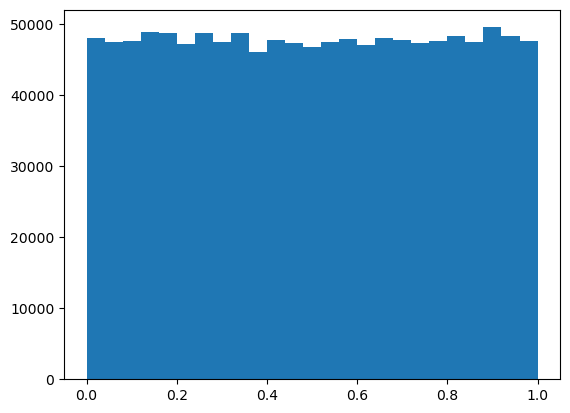

In [21]:
qt_zil2 = qt_scaler2.transform(train[['square_footage']])
plt.hist(qt_zil2, bins = 25)
plt.show()

In [22]:
train_scaled, val_scaled, test_scaled = w.scale_splits(X_train, X_val, X_test, MinMaxScaler(), ['square_footage', 'bedrooms'])

In [23]:
train_scaled

,id,bedrooms,bathrooms,square_footage,tax_value,yearbuilt,fips
index,,,,,,,
1333796,1858407,0.166667,2.0,0.002037,277190.0,1950,6037.0
47453,66239,0.055556,1.0,0.001418,171284.0,1923,6037.0
2032110,2830628,0.222222,3.0,0.004592,809631.0,1961,6059.0
1188554,1656233,0.277778,2.5,0.004193,160663.0,1965,6111.0
1703017,2372828,0.111111,1.0,0.002133,62490.0,1948,6037.0
...,...,...,...,...,...,...,...
1731121,2411565,0.166667,2.0,0.002246,410542.0,1955,6059.0
1669939,2326900,0.166667,2.5,0.003035,544000.0,1994,6111.0
1177839,1641387,0.166667,2.0,0.002344,142511.0,1949,6111.0
